In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('WA_Marketing-Campaign.csv')

In [3]:
df.head(10)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [29]:
#Promotion Distribution
df['Promotion'].value_counts()

Promotion
3    188
2    188
1    172
Name: count, dtype: int64

C:\Users\David PC\AppData\Local\Temp\ipykernel_9252\1842111045.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=count_per_promo, x='Promotion', y='LocationCount', palette='pastel')


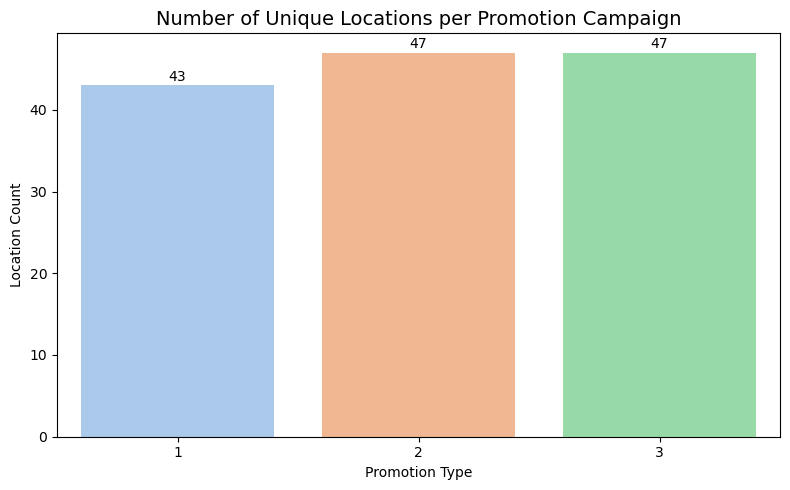

In [20]:
# Count number of unique locations per promotion
count_per_promo = df.groupby('Promotion')['LocationID'].nunique().reset_index()
count_per_promo.rename(columns={'LocationID': 'LocationCount'}, inplace=True)

# Plotting
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=count_per_promo, x='Promotion', y='LocationCount', palette='pastel')

# Add labels on top of each bar
for index, row in count_per_promo.iterrows():
    ax.text(row.name, row.LocationCount + 0.5, f"{row.LocationCount}", 
            color='black', ha="center", fontsize=10)

plt.title('Number of Unique Locations per Promotion Campaign', fontsize=14)
plt.xlabel('Promotion Type')
plt.ylabel('Location Count')
plt.tight_layout()
plt.show()


C:\Users\David PC\AppData\Local\Temp\ipykernel_9252\2451767525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=avg_sales_per_promo, x='Promotion', y='SalesInThousands', palette='viridis')


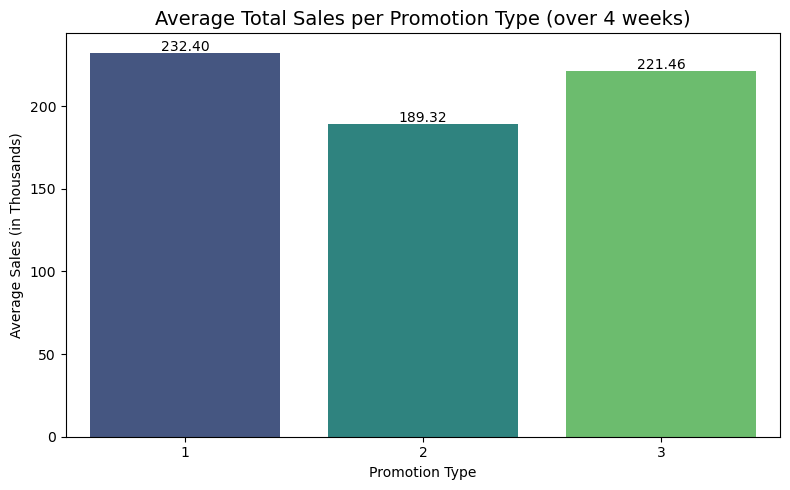

In [14]:
# Plot with value labels on each bar
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=avg_sales_per_promo, x='Promotion', y='SalesInThousands', palette='viridis')

# Add labels on top of each bar
for index, row in avg_sales_per_promo.iterrows():
    ax.text(row.name, row.SalesInThousands + 1, f"{row.SalesInThousands:.2f}", 
            color='black', ha="center", fontsize=10)

plt.title('Average Total Sales per Promotion Type (over 4 weeks)', fontsize=14)
plt.xlabel('Promotion Type')
plt.ylabel('Average Sales (in Thousands)')
plt.tight_layout()
plt.show()


In [23]:
count_per_promo = df.groupby('Promotion')['LocationID'].nunique().reset_index()
count_per_promo.rename(columns={'LocationID': 'LocationCount'}, inplace=True)
count_per_promo

,Promotion,LocationCount
0,1,43
1,2,47
2,3,47


## One-way ANOVA Analysis

In [50]:
print("\nStatistical significance check:")
if anova_results.loc['C(Promotion)', 'PR(>F)'] < 0.05:
    print("There is a statistically significant difference between the promotions.")
else:
    print("The difference between promotions is not statistically significant.")


Statistical significance check:
There is a statistically significant difference between the promotions.


In [37]:
model = ols('SalesInThousands ~ C(Promotion)', data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
display(anova_results)

,sum_sq,df,F,PR(>F)
C(Promotion),11449.174291,2.0,21.953486,6.765849e-10
Residual,142114.105414,545.0,NaN,NaN


F = 21.95: The F-statistic is high, suggesting strong evidence that group means differ.

P-value = 6.77e-10: This is much less than 0.05, meaning:

There is a statistically significant difference in average sales across the three marketing campaigns.

In [40]:
print("\nTukey's HSD for pairwise comparisons of promotions:")
tukey = pairwise_tukeyhsd(df['SalesInThousands'], df['Promotion'], alpha=0.05)
display(tukey.summary())


Tukey's HSD for pairwise comparisons of promotions:


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-10.7696,0.0,-14.7738,-6.7654,True
1,3,-2.7345,0.2444,-6.7388,1.2697,False
2,3,8.0351,0.0,4.1208,11.9493,True


Summary of Tukey HSD Results
Promotion 1 vs. Promotion 2: Promotion 1 is significantly better.
Promotion 1 vs. Promotion 3: No significant difference (they perform similarly)
Promotion 2 vs. Promotion 3: Promotion 3 is significantly better

In [51]:
# Looking at promotion performance by market size
best_by_market = avg_sales_by_market_promo.idxmax(axis=1)
print("\nBest promotion by market size:")
for market, promo in best_by_market.items():
    print(f"{market} Market: Promotion {promo}")


Best promotion by market size:
Large Market: Promotion 3
Medium Market: Promotion 1
Small Market: Promotion 1
